In [1]:
# 3.	Import the required packages with their customary aliases as follows:
#     `import pandas as pd`   
#     `import numpy as np`  
#     `import matplotlib.pyplot as plt`  
#     `import seaborn as sns`

import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
# 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`.

gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
# Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [5]:
# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?


**There are 8219 rows and 4 columns. The datatypes are as below: using .info()**

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [8]:
gdp_df.describe()

,Year,Value,Value Footnotes
count,8219.000000,8219.000000,0.0
mean,2006.672345,20270.976242,NaN
std,9.782986,22532.004246,NaN
min,1990.000000,510.822823,NaN
25%,1998.000000,4284.868430,NaN
50%,2007.000000,11916.457927,NaN
75%,2015.000000,28543.305542,NaN
max,2023.000000,174339.077325,NaN


In [9]:
# 6. Drop the `Value Footnotes` column
gdp_df_droppeddf = gdp_df.drop('Value Footnotes', axis=1)

In [10]:
gdp_df_droppeddf.describe()

,Year,Value
count,8219.000000,8219.000000
mean,2006.672345,20270.976242
std,9.782986,22532.004246
min,1990.000000,510.822823
25%,1998.000000,4284.868430
50%,2007.000000,11916.457927
75%,2015.000000,28543.305542
max,2023.000000,174339.077325


In [11]:
gdp_df_droppeddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [12]:
# Rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.
gdp_df_clean = gdp_df_droppeddf.rename(columns={"Country or Area":"Country"}) #renamed only one

In [13]:
gdp_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  8219 non-null   object 
 1   Year     8219 non-null   int64  
 2   Value    8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [14]:
# Rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.-- (renaming remaining two, no change to Year column)
gdp_df_new = gdp_df_clean.rename(columns={"Value":"GDP_Per_Capita"})

In [15]:
gdp_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


**Dataframe details:**
**gdp_df--> gdp_df_droppeddf (dropped 'Value Footnotes' column) --> gdp_df_clean (rename "Country or Area column to Country)---> gdp_df_new (renamed value column to GDP Per Capita)**

In [17]:
# 7a. How many countries have data for all years?
#gdp_df_all_years = gdp_df_new["Country"].isin(gdp_df_new["Year"("1990":"2023")])
#gdp_df_years = gdp_df_new.groupby("Country") ["Year"].agg
#gdp_df_years = gdp_df_new.pivot_table(values= "Country", index = "Year", columns ="Country", fill_value=0)
gdp_df_min_year = gdp_df_new["Year"].min()
gdp_df_min_year

1990

In [18]:
gdp_df_max_year = gdp_df_new["Year"].max()
print(gdp_df_max_year)

2023


In [19]:
gdp_df_total_years = gdp_df_max_year - gdp_df_min_year +1
gdp_df_total_years

34

In [20]:
gdp_df_country_yearcount = gdp_df_new["Country"].value_counts()
gdp_df_country_yearcount 

Country
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64

In [21]:
gdp_df_country_count = (gdp_df_country_yearcount == gdp_df_total_years).value_counts()
gdp_df_country_count

count
True     228
False     19
Name: count, dtype: int64

**228 countries have data for all years and 19 countries do not have data for all the years. Total countries 247 (228 +19).**

In [23]:
# 7b. Which countries are missing many years of data?
#gdp_df_missing_yeardata = gdp_df_new["Country"].value_counts()< gdp_df_country_yearcount
#gdp_df_missing_yeardata = gdp_df_new["Country"].value_counts([(gdp_df_new["Country"].value_counts())< gdp_df_country_yearcount]) 
#gdp_df_missing_yeardata = gdp_df_new["Country"].value_counts().isin(gdp_df_country==False) 
gdp_df_missing_yeardata = gdp_df_country_yearcount[gdp_df_country_yearcount<gdp_df_total_years]
print (gdp_df_missing_yeardata)

Country
Bhutan                       33
Syrian Arab Republic         33
Somalia                      33
Tonga                        33
Lebanon                      33
Greenland                    32
West Bank and Gaza           30
Serbia                       29
Montenegro                   27
San Marino                   26
CuraÃ§ao                     24
Afghanistan                  24
Virgin Islands               21
Cayman Islands               18
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, dtype: int64


**['Bhutan', 'Syrian Arab Republic', 'Somalia', 'Tonga', 'Lebanon',
       'Greenland', 'West Bank and Gaza', 'Serbia', 'Montenegro', 'San Marino',
       'CuraÃ§ao', 'Afghanistan', 'Virgin Islands', 'Cayman Islands',
       'Faroe Islands', 'Kosovo', 'Sint Maarten (Dutch part)',
       'Turks and Caicos Islands', 'Djibouti']**

In [25]:
# 7c. Look at the number of observations per year.
#observations_per_year = gdp_df_missing_yeardata.plot(x="Year", y="Country", kind="line", marker='*') ##showing count of years for each country
#plt.legend("Country")
#plt.title("Observations_per_year")
#plt.show()

observations_per_year = gdp_df_new["Year"].value_counts() #Count of countries having data that year.
print(observations_per_year)

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64


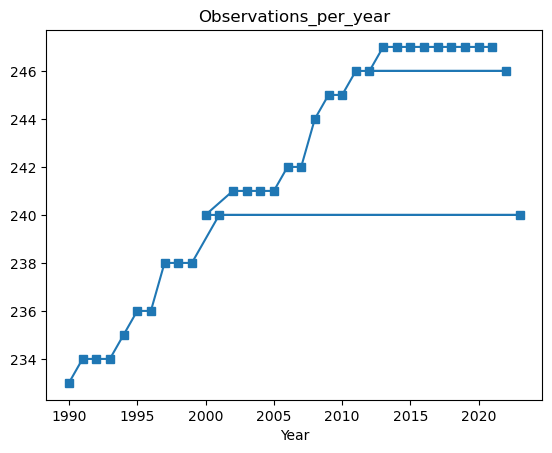

In [26]:
# 7d. What do you notice? 
observations_per_year_plot = observations_per_year.plot(x="Year", y="No_of_Observations", kind = "line", marker ='s')
plt.title("Observations_per_year")
plt.show()

**Observations (count of countries with data) is increasing every year.**

In [28]:
# 8a. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020.
gdp_2020 = gdp_df_new.loc[gdp_df_new["Year"]==2020]
print(gdp_2020)

                          Country  Year  GDP_Per_Capita
3                     Afghanistan  2020     2769.685745
27    Africa Eastern and Southern  2020     3861.111238
61     Africa Western and Central  2020     4622.731427
95                        Albania  2020    14650.395929
129                       Algeria  2020    14194.155748
...                           ...   ...             ...
8068               Virgin Islands  2020    45055.782930
8090           West Bank and Gaza  2020     5423.682547
8120                        World  2020    18600.986362
8154                       Zambia  2020     3391.595412
8188                     Zimbabwe  2020     2987.269823

[247 rows x 3 columns]


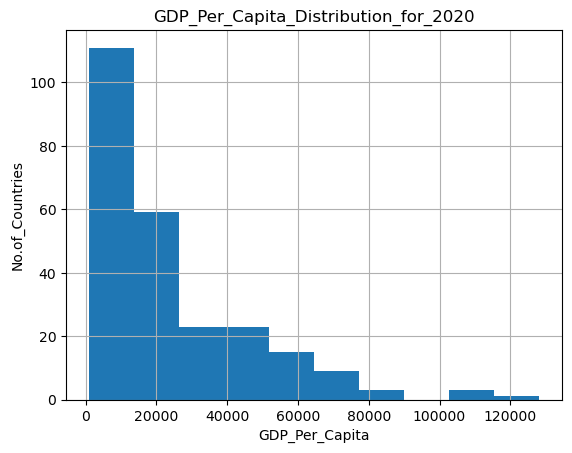

In [29]:
# 8b. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. 
# Create a histogram 
gdp_histogram = gdp_2020["GDP_Per_Capita"].hist()
plt.title("GDP_Per_Capita_Distribution_for_2020")
plt.xlabel("GDP_Per_Capita")
plt.ylabel("No.of_Countries")
plt.show()

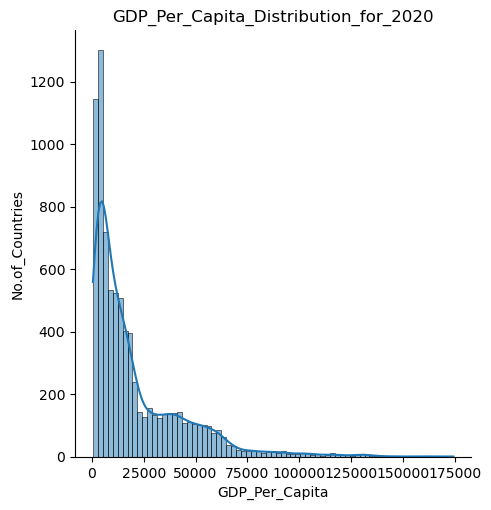

In [30]:
sns.displot(data=gdp_df_new["GDP_Per_Capita"], kde = True)
plt.title("GDP_Per_Capita_Distribution_for_2020")
plt.xlabel("GDP_Per_Capita")
plt.ylabel("No.of_Countries")
plt.show()
# Why is bar showing more than 1200, when there are 247 countries?

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

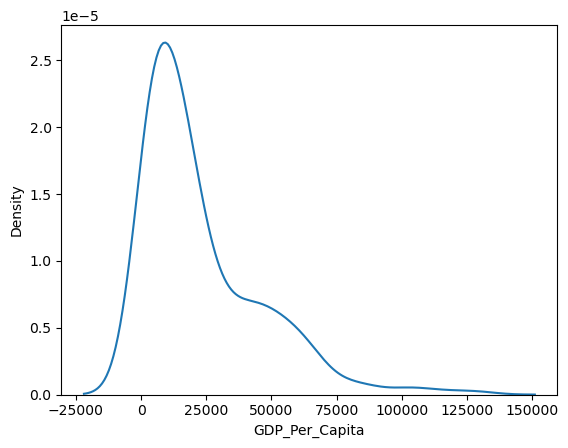

In [31]:
# 8c.  density plot
sns.kdeplot(data=gdp_2020, x='GDP_Per_Capita')

<Axes: ylabel='GDP_Per_Capita'>

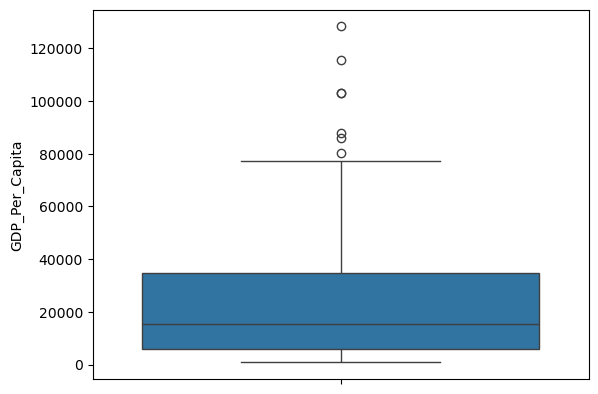

In [32]:
# 8d. boxplot
#sns.boxplot(x=gdp_2020["Country"],y=gdp_2020["GDP_Per_Capita"]) 
sns.boxplot(y=gdp_2020["GDP_Per_Capita"]) 

<Axes: ylabel='GDP_Per_Capita'>

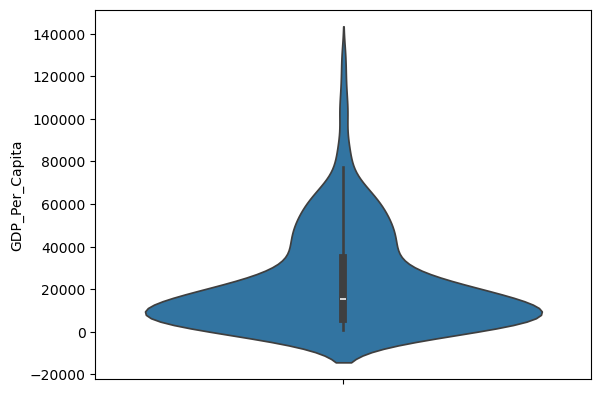

In [33]:
# 8e. violin plot
sns.violinplot(y=gdp_2020["GDP_Per_Capita"])

**8f. What do you notice when you look at these plots?
Most countries have GDP_Per_Capita income between 0 to 40000.**


**8g. How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
All plots shows the data is towards the lower values. 
The count of countries is represented only in Histogram.
The outliers are represented in most, however a Boxplot shows the outliers more clearly.**

In [41]:
# 9. What was the median GDP per capita value in 2020?
gdp_2020_mean = gdp_2020["GDP_Per_Capita"].mean()
print(gdp_2020_mean)

23044.942555569738


In [43]:
gdp_2020_median = gdp_2020["GDP_Per_Capita"].median()
print(gdp_2020_median)

15309.23598817024


**Median GDP per capita value in 2020 is 15309.23598817024**

In [ ]:
# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
# 	* A boxplot
# 	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
# 	* A scatterplot
# 	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
# Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
# 11. Which country was the first to have a GDP per capita greater than $100,000?
# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
# 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?
# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.
# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
# 16. Look at the number of observations in this dataset per year. What do you notice?
# 17. What is the first year to have a non-zero internet users percentage value?
# 18. How does the distribution of internet users percent differ for 2000 and 2014?
# 19. For how many countries was the percentage of internet users below 5% in 2014?
# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.
# 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?
# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.
# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.
# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".
# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

# ### Bonus exercise:
# 1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.
